Exercises  
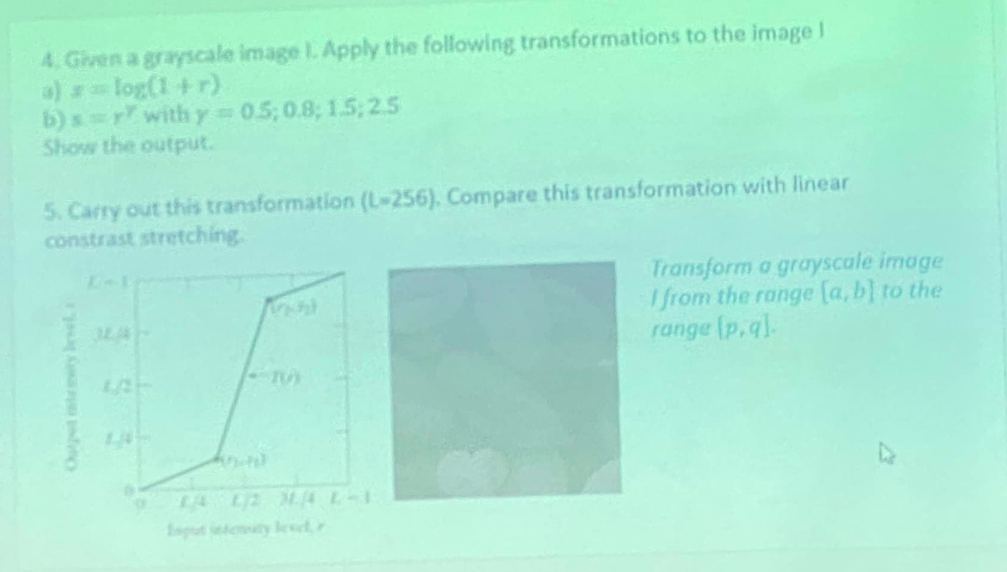

In [19]:
#Answers question 4
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load and process image
image_path = "/home/tairo/CODETHAYTIEN/XLA/ImageUseToTest/Gray.jpeg"

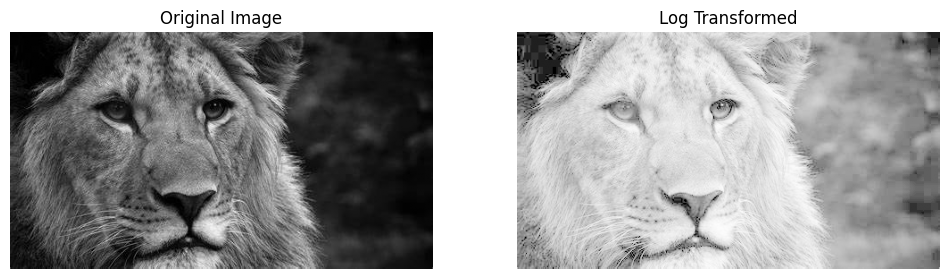

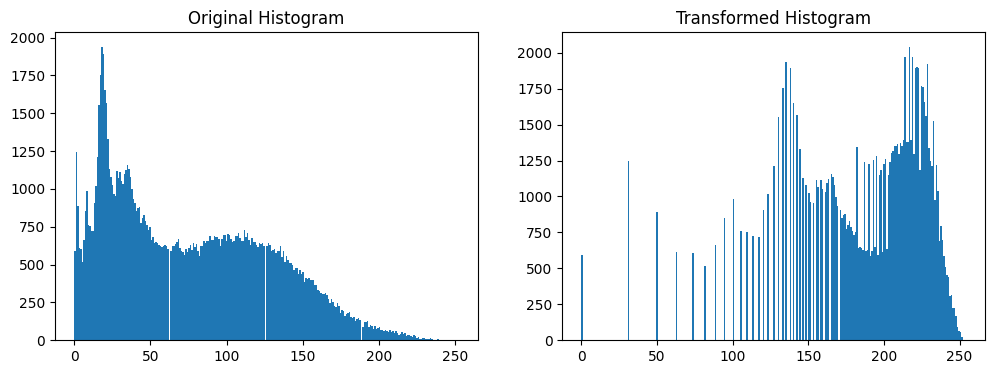

In [21]:
#Question a
def log_transform(image_path):
    # Read grayscale image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=float)
    
    # Apply log transformation
    # s = log(1+r)
    transformed = np.log1p(img_array)
    
    # Normalize to 0-255 range
    transformed = 255 * (transformed - transformed.min()) / (transformed.max() - transformed.min())
    transformed = transformed.astype(np.uint8)
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original image
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    # Transformed image
    ax2.imshow(transformed, cmap='gray')
    ax2.set_title('Log Transformed')
    ax2.axis('off')
    
    plt.show()
    
    # Plot histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.hist(img_array.ravel(), bins=256)
    ax1.set_title('Original Histogram')
    ax2.hist(transformed.ravel(), bins=256)
    ax2.set_title('Transformed Histogram')
    plt.show()

# Test the transformation
image_path = "/home/tairo/CODETHAYTIEN/XLA/ImageUseToTest/Gray.jpeg"
log_transform(image_path)

In [22]:
def gamma_histogram(image_path, gamma_values):
    # Load image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=float) / 255.0
    
    # Create subplot grid (2 rows for each gamma: image and histogram)
    rows = len(gamma_values) + 1  # +1 for original
    fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
    
    # Original image and histogram
    axes[0,0].imshow(img, cmap='gray')
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')
    
    axes[0,1].hist(img_array.ravel()*255, bins=256, color='blue', alpha=0.7)
    axes[0,1].set_title('Original Histogram')
    axes[0,1].set_xlim([0,255])
    
    # Process each gamma value
    for idx, gamma in enumerate(gamma_values, 1):
        # Apply gamma correction
        corrected = np.power(img_array, gamma)
        corrected_255 = (corrected * 255).astype(np.uint8)
        
        # Plot image
        axes[idx,0].imshow(corrected_255, cmap='gray')
        axes[idx,0].set_title(f'Gamma = {gamma}')
        axes[idx,0].axis('off')
        
        # Plot histogram
        axes[idx,1].hist(corrected_255.ravel(), bins=256, color='blue', alpha=0.7)
        axes[idx,1].set_title(f'Histogram (Gamma = {gamma})')
        axes[idx,1].set_xlim([0,255])
    
    plt.tight_layout()
    plt.show()

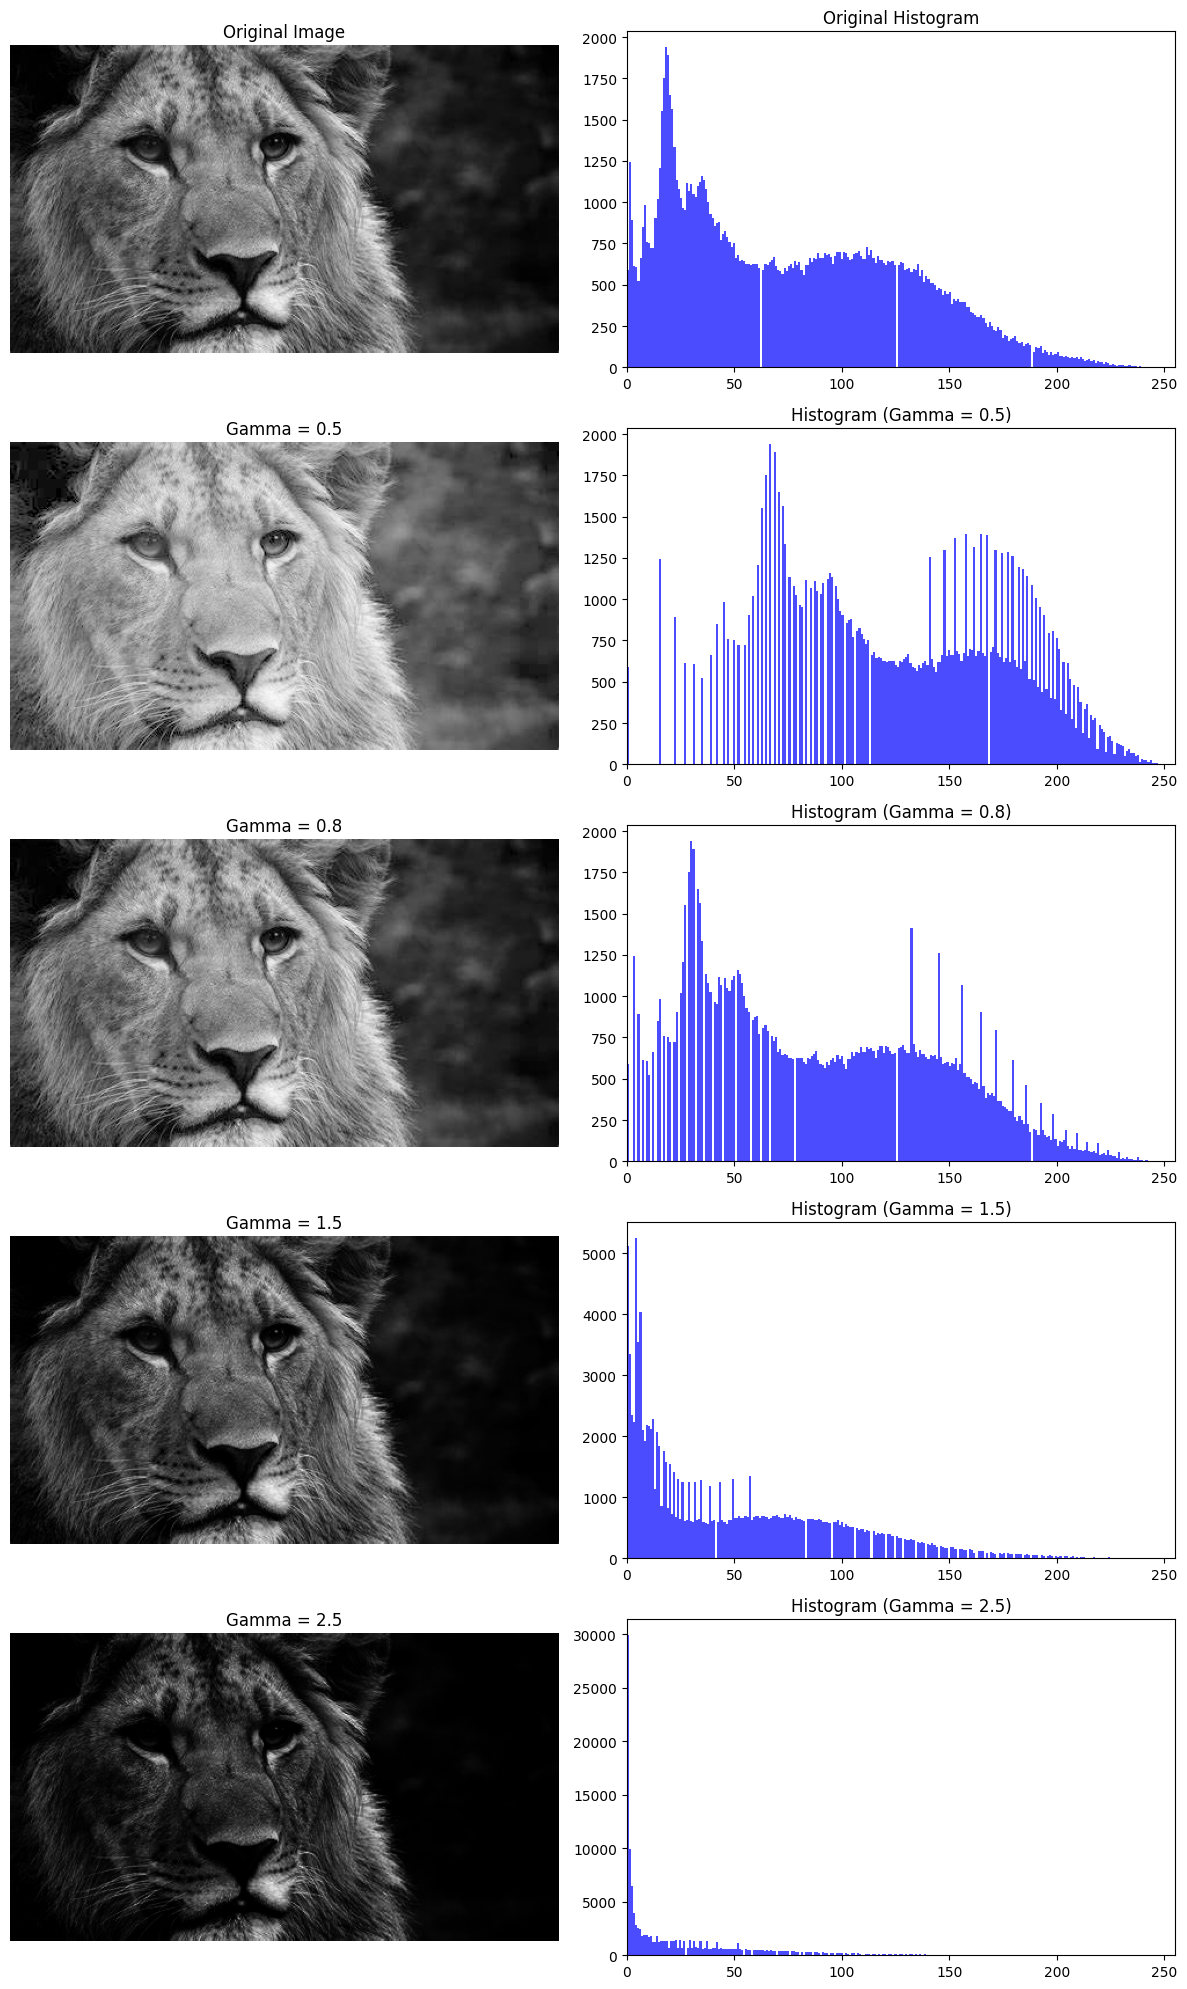

In [23]:
gamma_values = [0.5, 0.8, 1.5, 2.5]
gamma_histogram(image_path, gamma_values)